In [1]:
import os
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

import itertools
import glob

In [3]:
# Load the Excel file
file_path = "./Data/Heirarchy.csv"
df_hierarchy = pd.read_csv(file_path)
df_hierarchy

,ID,Topic,Parent,Root
0,15 Documentation,Documentation,Documentation,Software Development Issues
1,1 UI Enhancement,User Experience & Interaction,User Experience & Interaction,Software Development Issues
2,6 Notification,User Experience & Interaction,User Experience & Interaction,Software Development Issues
3,9 Localization and Translation,User Experience & Interaction,User Experience & Interaction,Software Development Issues
4,46 Tooltip Enhancement,User Experience & Interaction,User Experience & Interaction,Software Development Issues
5,25 Miscellaneous Feature Update,Feature Updates,User Experience & Interaction,Software Development Issues
6,39 Search Feature,Feature Updates,User Experience & Interaction,Software Development Issues
7,16 URL and Hyperlink,Feature Updates,User Experience & Interaction,Software Development Issues
8,2 Logging and Error Handling,Observability,Infrastructure,Software Development Issues
9,26 Event Analytics,Observability,Infrastructure,Software Development Issues


In [42]:
l2_size

{'Documentation': 3267,
 'User Experience & Interaction': 44885,
 'Infrastructure': 27188,
 'Development & Maintenance': 48007,
 'Wallet': 58456,
 'Networking': 10211,
 'Digital Asset': 14295,
 'Transaction': 8084,
 'Mechanisms': 2589,
 'Community Interaction': 6556,
 'Security and Data Integrity': 5449}

In [45]:
topic_size = {}
l1_size = {}
l2_size = {}

# Extract topic-wise grouping from the hierarchy CSV
topic_mapping = defaultdict(list)

for _, row in df_hierarchy.iterrows():
    topic_name = row['Topic']
    csv_id = str(row['ID']).split(" ")[0].strip()  # Convert ID to string to match filenames

    if topic_name and csv_id:
        topic_mapping[topic_name].append(csv_id)

# Load and group CSV files
merged_data = {}
csv_folder = "./Data/Output-BERTopic/Topics"
for topic, ids in topic_mapping.items():
    topic_files = [os.path.join(csv_folder, f"topic_{csv_id}.csv") for csv_id in ids if os.path.exists(os.path.join(csv_folder, f"topic_{csv_id}.csv"))]
    # Merge CSV files for each topic
    if topic_files:
        df_list = [pd.read_csv(file) for file in topic_files]
        for df,file in zip(df_list, topic_files):
            topic_size[file] = df.shape[0]
        merged_df = pd.concat(df_list, ignore_index=True)
        merged_data[topic] = merged_df

        l1_size[topic] = merged_df.shape[0]
        # Save the merged file
        merged_df.to_csv(f"./Data/Output-BERTopic/MergedTopics/{topic}.csv", index=False)

print("All topic-wise merging completed.")

# Extract topic-wise grouping from the hierarchy CSV
topic_mapping = defaultdict(list)

for _, row in df_hierarchy.iterrows():
    topic_name = row['Parent']
    csv_id = str(row['ID']).split(" ")[0].strip()  # Convert ID to string to match filenames

    if topic_name and csv_id:
        topic_mapping[topic_name].append(csv_id)

l2_size = {}
merged_data = {}
csv_folder = "./Data/Output-BERTopic/Topics"
for topic, ids in topic_mapping.items():
    topic_files = [os.path.join(csv_folder, f"topic_{csv_id}.csv") for csv_id in ids if os.path.exists(os.path.join(csv_folder, f"topic_{csv_id}.csv"))]
    # Merge CSV files for each topic
    if topic_files:
        df_list = [pd.read_csv(file) for file in topic_files]
        merged_df = pd.concat(df_list, ignore_index=True)
        merged_data[topic] = merged_df
        l2_size[topic] = merged_df.shape[0]
        # Save the merged file
        merged_df.to_csv(f"./Data/Output-BERTopic/MergedTopics-L2/{topic}.csv", index=False)
        
print("All topic-wise merging completed.")


All topic-wise merging completed.
All topic-wise merging completed.


In [46]:
sum(topic_size.values())+pd.read_csv("./Data/Output-BERTopic/Topics/topic_-1.csv").shape[0] == pd.read_csv("./Data/AllIssues-title.csv").shape[0]

True

In [47]:
sum(l2_size.values())+pd.read_csv("./Data/Output-BERTopic/Topics/topic_-1.csv").shape[0] == pd.read_csv("./Data/AllIssues-title.csv").shape[0]

True

In [ ]:
csv_files = glob.glob("./Data/Output-BERTopic/MergedTopics-L2/*.csv")
total = 0
for csv in csv_files:
    df = pd.read_csv(csv)
    total += df.shape[0]
print(f"Total number of interactions across all repositories: {total}")

# Base topics

In [4]:
#total = pd.read_csv("./Data/AllIssues-title.csv").shape[0]
csv_folder = "./Data/Output-BERTopic/Topics"

names = []
values = []
for _, row in df_hierarchy.iterrows():
    topic_name = " ".join(row['ID'].split(" ")[1:])
    names.append(topic_name)
    csv_id = str(row['ID']).split(" ")[0].strip() 
    values.append(pd.read_csv(os.path.join(csv_folder, f"topic_{csv_id}.csv")).shape[0])

In [5]:
#total = pd.read_csv("./Data/AllIssues-title.csv").shape[0]
csv_folder = "./Data/Output-BERTopic/Topics"

names = []
values = []
for _, row in df_hierarchy.iterrows():
    topic_name = " ".join(row['ID'].split(" ")[1:])
    names.append(topic_name)
    csv_id = str(row['ID']).split(" ")[0].strip() 
    values.append(pd.read_csv(os.path.join(csv_folder, f"topic_{csv_id}.csv")).shape[0])

t = pd.DataFrame({"Topic": names, "Count": values, "Parcent": ["{"+'{0:.2f}'.format((val/sum(values))*100)+"%}" for val in values]})

In [6]:
t = t.sort_values("Count",ascending=False)
names = t["Topic"].values
values = t["Count"].values


In [7]:
df_hierarchy["Percentage"] = t["Parcent"]

In [42]:
t.to_csv("h.csv", index=False)

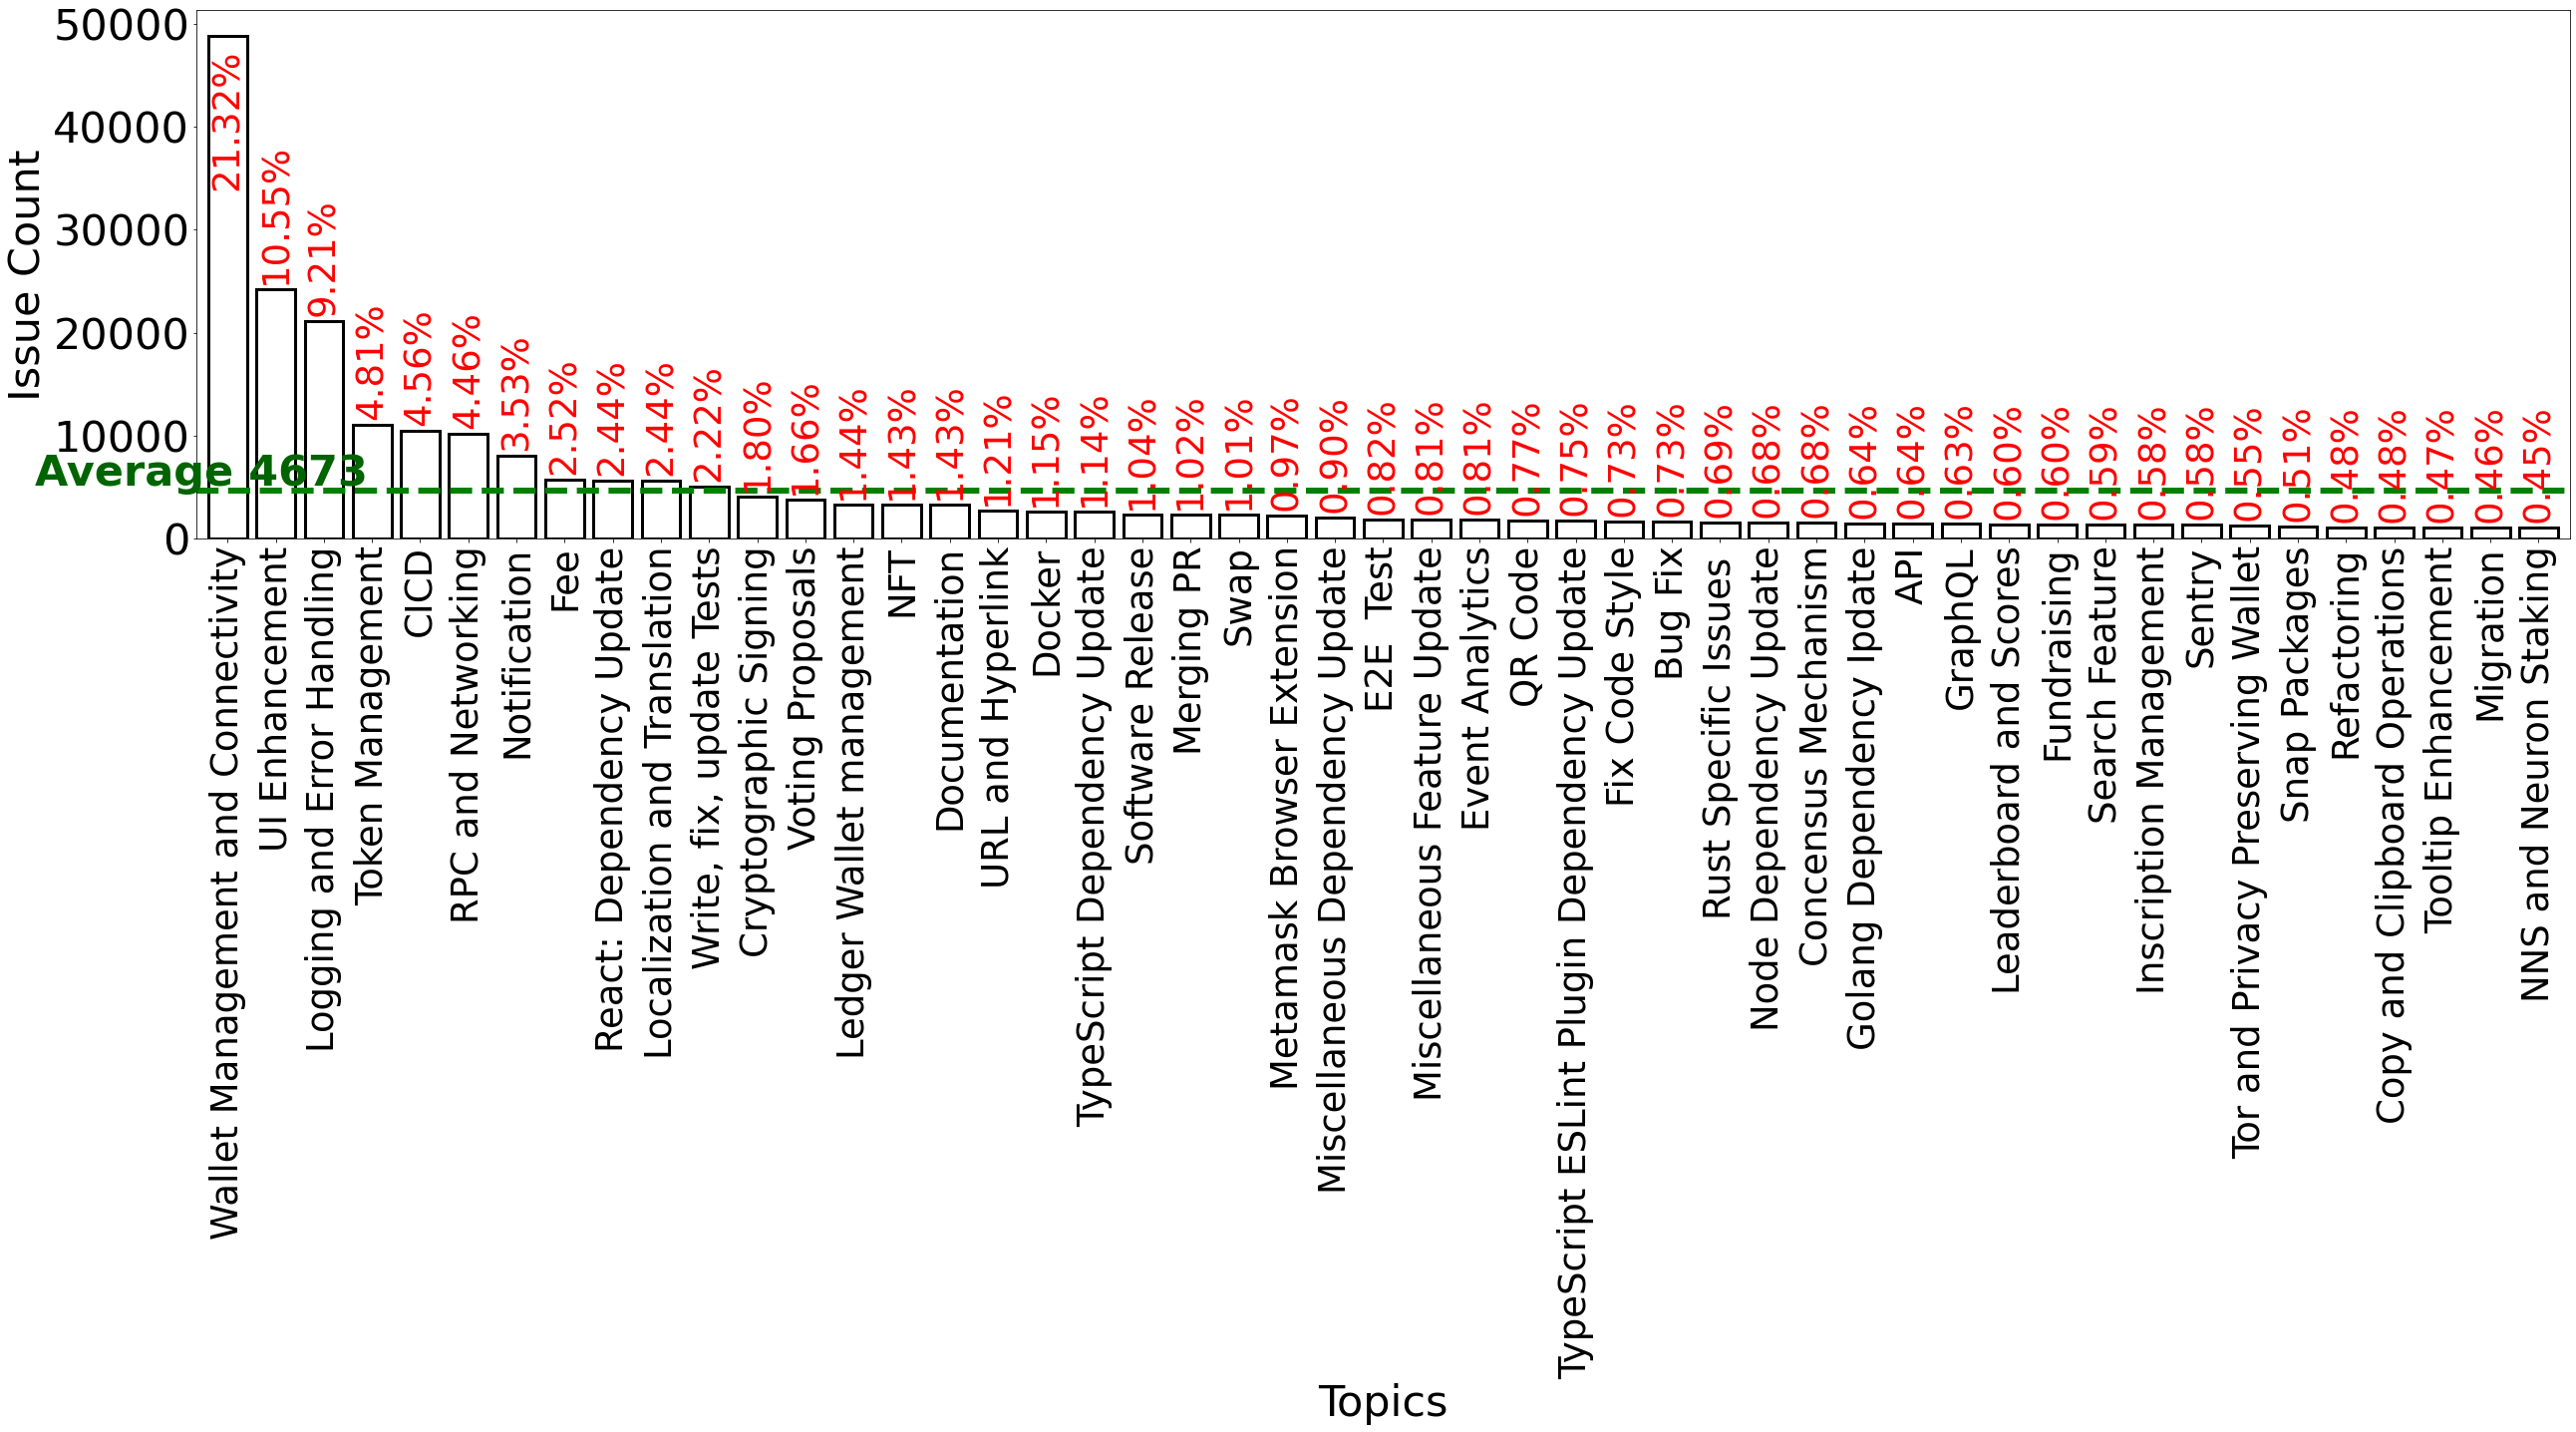

In [28]:

fontsize = 43
# Compute Average
avg_value = np.mean(values)

# Calculate percentages
percentages = [(v / sum(values)) * 100 for v in values]

# Plot bar chart
fig, ax = plt.subplots(figsize=(36, 20))
bars = ax.bar(names, values, edgecolor="black", linewidth=3, color="white")

# Rotate labels for readability
plt.xticks(rotation=90, fontsize=fontsize)
plt.yticks(fontsize=fontsize)

# Add percentage labels inside the bars
for bar, percent in zip(bars, percentages):
    height = bar.get_height()
    if percent > 21:
        ax.text(bar.get_x() + bar.get_width()/2., height - 15000, f'{percent:.2f}%', 
            ha='center', va='bottom', fontsize=fontsize-6, rotation=90, color="red", )
    else:
        ax.text(bar.get_x() + bar.get_width()/2., height + 500, f'{percent:.2f}%', 
                ha='center', va='bottom', fontsize=fontsize-6, rotation=90, color="red", )

# Draw the average line
plt.axhline(y=avg_value, color='green', linestyle='dashed', linewidth=6)
plt.text(-4,  avg_value + 500, f'Average {int(avg_value)}', 
         color="darkgreen", fontsize=fontsize,  weight='bold',)

plt.xticks(fontsize=fontsize - 6)
# Labels and title
plt.xlabel("Topics", fontsize=fontsize)
plt.ylabel("Issue Count", fontsize=fontsize)
#plt.title("Bar Chart Representation with Percentages Inside Bars", fontsize=18)
plt.margins(x=0.005, tight=True)
plt.tight_layout()
plt.savefig("./outputs/49_topics.png", dpi=300)
plt.savefig("./outputs/49_topics.pdf", dpi=300, format="pdf")
plt.savefig("./outputs/49_topics.svg", format="svg")
plt.show()

# Resolution time- L1

In [5]:
res = []
all_vals = []
csv_files = glob.glob("./Data/Output-BERTopic/MergedTopics/*.csv")
for csv in csv_files:
    df = pd.read_csv(csv)
    df = df[df["State"]=="closed"]
    df = df[~df["CreatedAt"].isna()]
    df['CreatedAt'] = pd.to_datetime(df['CreatedAt']) 
    df = df[~df["ClosedAt"].isna()]
    df['ClosedAt'] = pd.to_datetime(df['ClosedAt']) 
    df["ResolutionTime"] = (df["ClosedAt"] - df["CreatedAt"]).dt.total_seconds()
    # filter here
    #df = df[df["ResolutionTime"] > 600]
    #
    df["ResolutionTime"] = (df["ClosedAt"] - df["CreatedAt"]).dt.total_seconds() / 86400
    res.append({
        "Category": os.path.basename(csv).split(".")[0],
        "Min": np.min(df["ResolutionTime"]),
        "Max": np.max(df["ResolutionTime"]),
        "Mean": np.mean(df["ResolutionTime"]),
        "Median": np.median(df["ResolutionTime"]),
    })
    all_vals.append({
        "Category": os.path.basename(csv).split(".")[0],
        "values": df["ResolutionTime"].to_list()
    })

In [6]:
pd.DataFrame(res)

,Category,Min,Max,Mean,Median
0,Community Interaction,0.000046,1935.541597,32.003539,1.205625
1,Build and Deployment,0.000035,2201.851551,18.717329,0.213947
2,Digital Asset,0.000000,2057.943727,32.554390,1.141586
3,Wallet Management,0.000023,2896.187477,45.660226,2.027546
4,Documentation,0.000000,1595.286354,20.690852,0.602234
5,Feature Updates,0.000012,2091.854016,25.379183,0.832517
6,User Experience & Interaction,0.000023,2537.029190,27.822163,0.878414
7,Data Access Interfaces,0.000046,1945.582674,19.115377,0.838877
8,Testing,0.000035,2017.112164,24.644431,0.884236
9,Code Improvements,0.000058,1627.833762,28.822958,0.660312


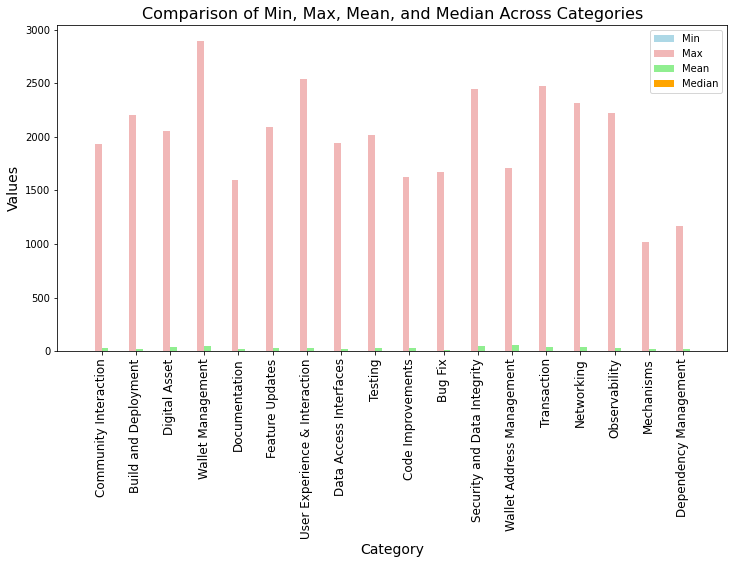

In [ ]:
categories = [item['Category'] for item in res]
min_values = [item['Min'] for item in res]
max_values = [item['Max'] for item in res]
mean_values = [item['Mean'] for item in res]
median_values = [item['Median'] for item in res]

# Bar width
bar_width = 0.2  
x = np.arange(len(categories))

# Plot bar chart
plt.figure(figsize=(30, 18))

plt.bar(x - 1.5 * bar_width, min_values, width=bar_width, label="Min", color="lightblue")
plt.bar(x - 0.5 * bar_width, max_values, width=bar_width, label="Max", color="#F1B7B7")
plt.bar(x + 0.5 * bar_width, mean_values, width=bar_width, label="Mean", color="lightgreen")
plt.bar(x + 1.5 * bar_width, median_values, width=bar_width, label="Median", color="orange")

# Labels and title
plt.xlabel("Category", fontsize=14)
plt.ylabel("Values", fontsize=14)
plt.title("Comparison of Min, Max, Mean, and Median Across Categories", fontsize=16)
plt.xticks(x, categories, rotation=90, fontsize=12)
plt.legend()

# Show plot
plt.show()


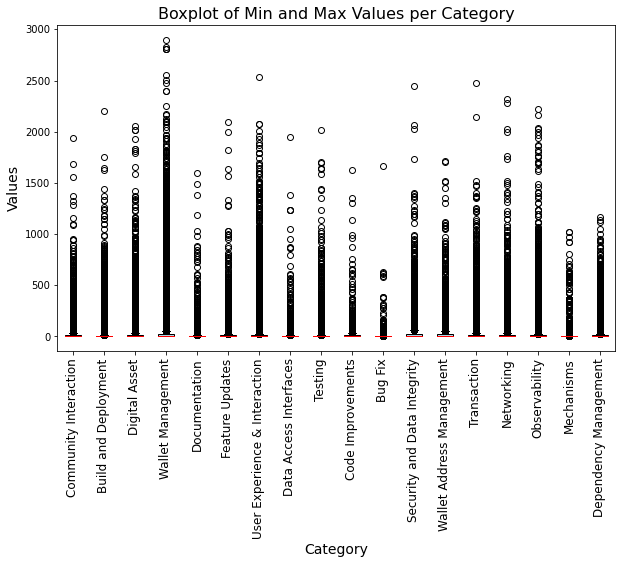

In [ ]:
categories = [item['Category'] for item in all_vals]
box_data = [item["values"] for item in all_vals]

# Plot the box plot
plt.figure(figsize=(30, 18))
plt.boxplot(box_data, labels=categories, vert=True, patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="black"),
            capprops=dict(color="black"),
            whiskerprops=dict(color="black"),
            medianprops=dict(color="red"))

x = np.arange(1, len(categories)+1)
plt.xticks(x, labels=categories, rotation=90, fontsize=12)
# Labels and title
plt.xlabel("Category", fontsize=14)
plt.ylabel("Values", fontsize=14)
plt.title("Boxplot of Min and Max Values per Category", fontsize=16)

# Show plot
plt.show()

In [152]:
pd.DataFrame(res)

,Category,Min,Max,Mean,Median
0,Community Interaction,0.006968,1935.541597,34.940353,1.928808
1,Build and Deployment,0.006968,2201.851551,23.819245,0.828148
2,Digital Asset,0.006956,2057.943727,36.003909,1.959178
3,Wallet Management,0.006956,2896.187477,50.219097,3.048310
4,Documentation,0.006991,1595.286354,24.737658,0.982072
5,Feature Updates,0.006956,2091.854016,30.145036,1.665579
6,User Experience & Interaction,0.006956,2537.029190,31.933204,1.478600
7,Data Access Interfaces,0.007014,1945.582674,21.424109,1.107431
8,Testing,0.006979,2017.112164,26.829444,1.075613
9,Code Improvements,0.007095,1627.833762,33.634345,1.133009


# Resolution time - L2

In [54]:
res = []
all_vals = []
csv_files = glob.glob("./Data/Output-BERTopic/MergedTopics-L2/*.csv")
for csv in csv_files:
    df = pd.read_csv(csv)
    df = df[df["State"]=="closed"]
    df = df[~df["CreatedAt"].isna()]
    df['CreatedAt'] = pd.to_datetime(df['CreatedAt']) 
    df = df[~df["ClosedAt"].isna()]
    df['ClosedAt'] = pd.to_datetime(df['ClosedAt']) 
    df["ResolutionTime"] = (df["ClosedAt"] - df["CreatedAt"]).dt.total_seconds()
    # filter here
    #df = df[df["ResolutionTime"] > 600]
    #
    df["ResolutionTime"] = (df["ClosedAt"] - df["CreatedAt"]).dt.total_seconds() / 86400
    res.append({
        "Category": os.path.basename(csv).split(".")[0],
        "Min": np.min(df["ResolutionTime"]),
        "Max": np.max(df["ResolutionTime"]),
        "Mean": np.mean(df["ResolutionTime"]),
        "Median": np.median(df["ResolutionTime"]),
    })
    all_vals.append({
        "Category": os.path.basename(csv).split(".")[0],
        "values": df["ResolutionTime"].to_list()
    })

In [60]:
pd.DataFrame(res).sort_values("Mean", ascending=True)

,Category,Min,Max,Mean,Median
10,Mechanisms,0.000035,1022.121065,19.811131,0.622662
6,Development & Maintenance,0.000012,2201.851551,20.496648,0.695370
2,Documentation,0.000000,1595.286354,20.690852,0.602234
3,User Experience & Interaction,0.000012,2537.029190,27.495159,0.872523
4,Infrastructure,0.000000,2218.656794,28.822421,0.981759
0,Community Interaction,0.000046,1935.541597,32.003539,1.205625
9,Networking,0.000035,2319.351366,32.339767,0.958993
1,Digital Asset,0.000000,2057.943727,32.554390,1.141586
8,Transaction,0.000035,2474.690509,36.651277,1.803733
7,Security and Data Integrity,0.000035,2446.680718,45.469607,2.929271


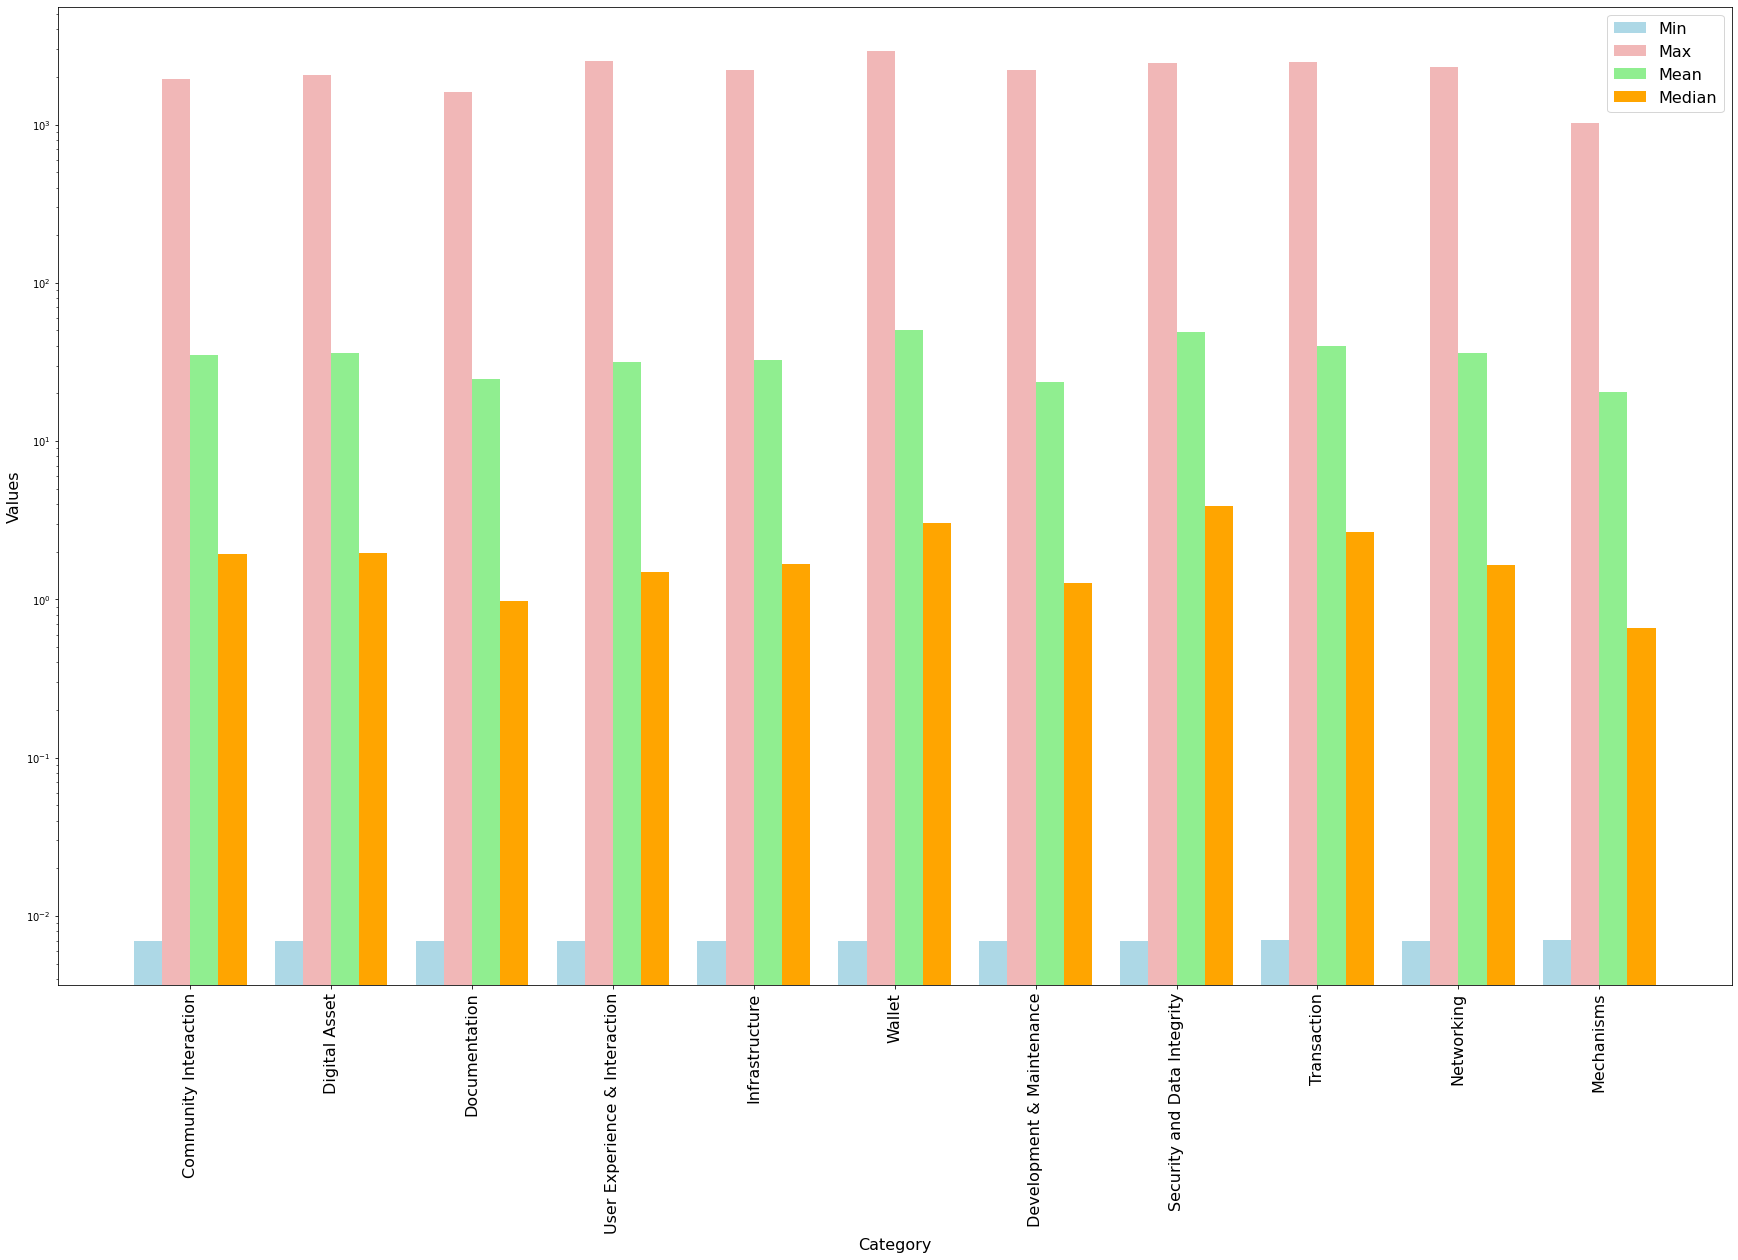

In [52]:
categories = [item['Category'] for item in res]
min_values = [item['Min'] for item in res]
max_values = [item['Max'] for item in res]
mean_values = [item['Mean'] for item in res]
median_values = [item['Median'] for item in res]

# Bar width
bar_width = 0.2  
x = np.arange(len(categories))

# Plot bar chart
plt.figure(figsize=(30, 18))

plt.bar(x - 1.5 * bar_width, min_values, width=bar_width, label="Min", color="lightblue")
plt.bar(x - 0.5 * bar_width, max_values, width=bar_width, label="Max", color="#F1B7B7")
plt.bar(x + 0.5 * bar_width, mean_values, width=bar_width, label="Mean", color="lightgreen")
plt.bar(x + 1.5 * bar_width, median_values, width=bar_width, label="Median", color="orange")

# Labels and title
plt.xlabel("Category", fontsize=16)
plt.ylabel("Values", fontsize=16)
#plt.title("Comparison of Min, Max, Mean, and Median Across Categories", fontsize=16)
plt.xticks(x, categories, rotation=90, fontsize=16)
plt.legend(fontsize=16)

plt.yscale('log')
# Show plot
plt.show()

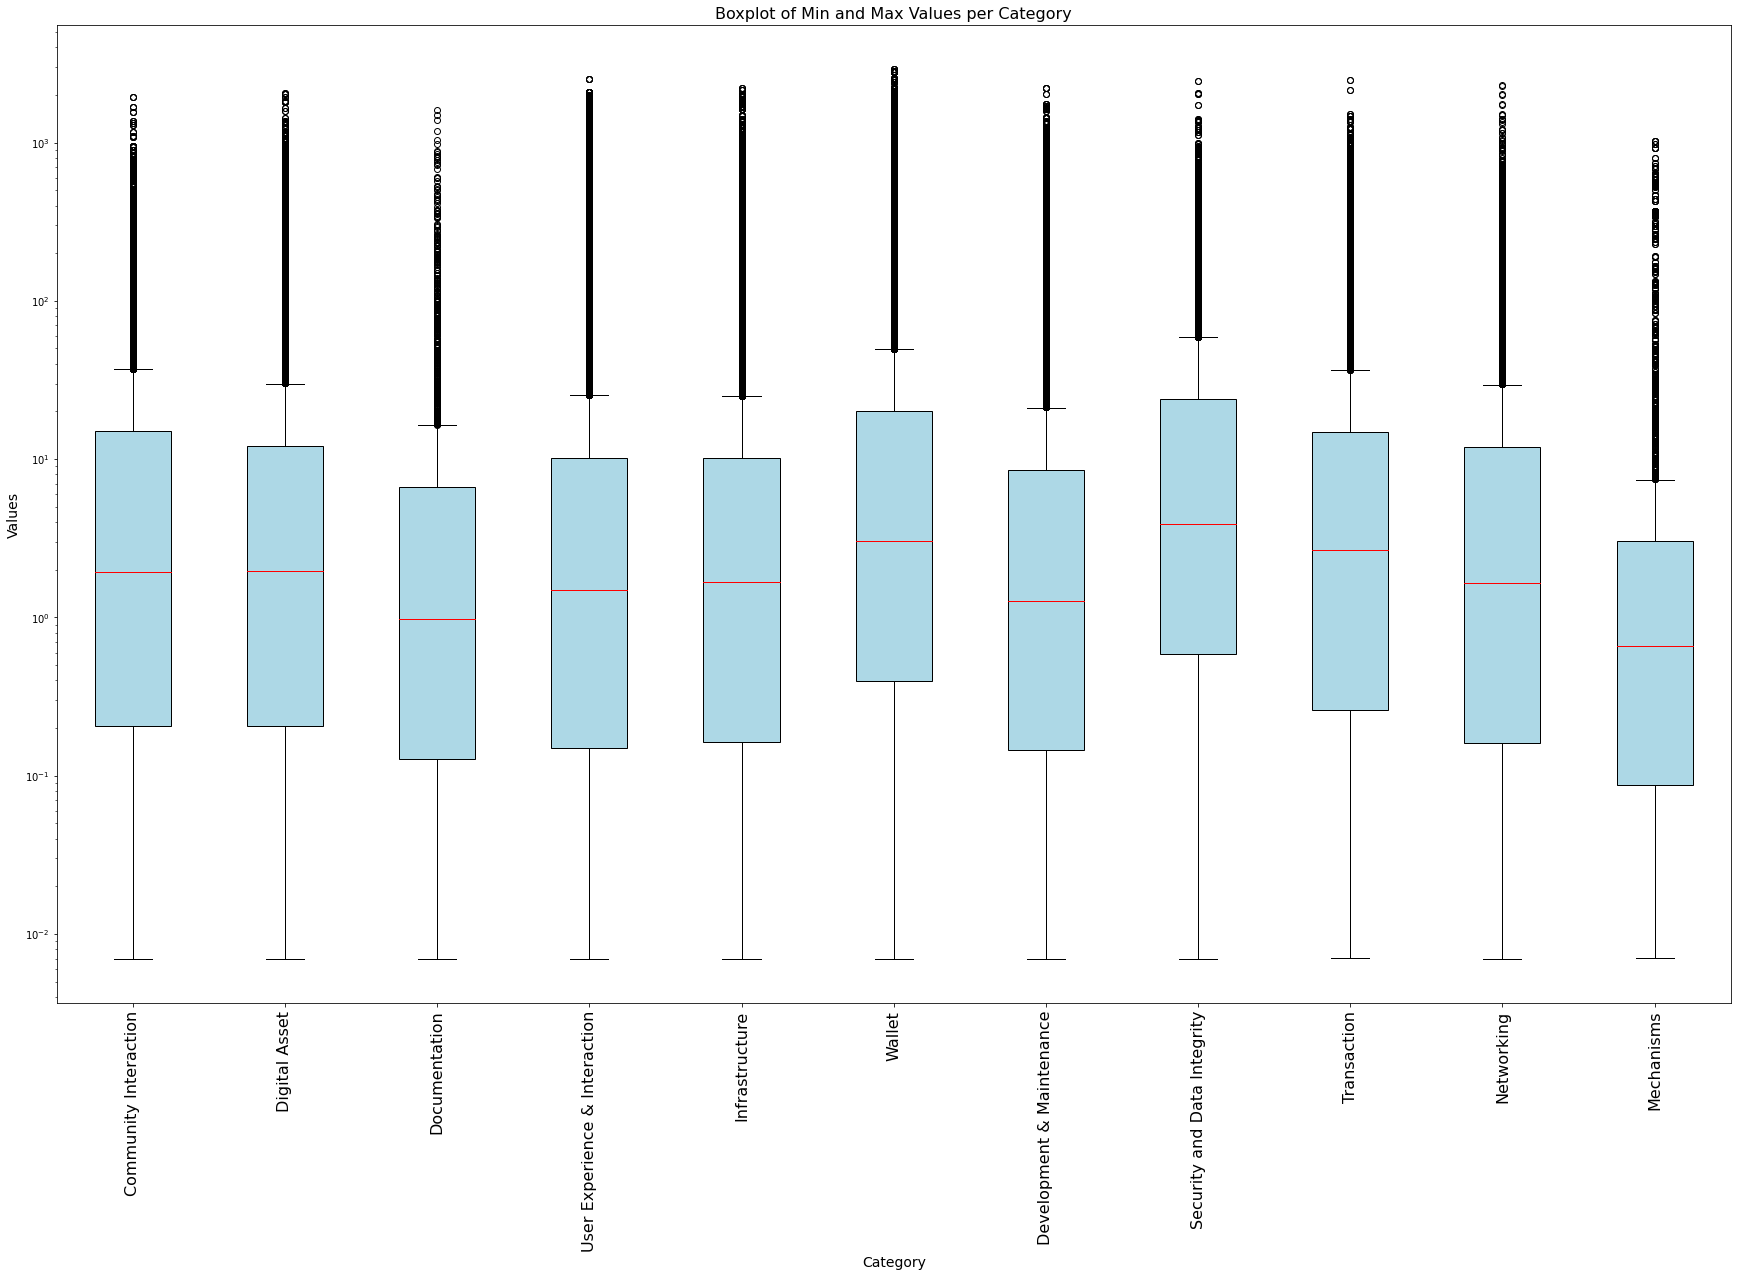

In [51]:
categories = [item['Category'] for item in all_vals]
box_data = [item["values"] for item in all_vals]

# Plot the box plot
plt.figure(figsize=(30, 18))
plt.boxplot(box_data, labels=categories, vert=True, patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="black"),
            capprops=dict(color="black"),
            whiskerprops=dict(color="black"),
            medianprops=dict(color="red"))

x = np.arange(1, len(categories)+1)
plt.xticks(x, categories, rotation=90, fontsize=16)
# Labels and title
plt.xlabel("Category", fontsize=14)
plt.ylabel("Values", fontsize=14)
plt.title("Boxplot of Min and Max Values per Category", fontsize=16)

plt.yscale('log')
# Show plot
plt.show()

In [53]:
pd.DataFrame(res).to_csv("res_time.csv", index=False)

In [61]:
pd.DataFrame(res)

,Category,Min,Max,Mean,Median
0,Community Interaction,0.000046,1935.541597,32.003539,1.205625
1,Digital Asset,0.000000,2057.943727,32.554390,1.141586
2,Documentation,0.000000,1595.286354,20.690852,0.602234
3,User Experience & Interaction,0.000012,2537.029190,27.495159,0.872523
4,Infrastructure,0.000000,2218.656794,28.822421,0.981759
5,Wallet,0.000023,2896.187477,45.949038,2.020764
6,Development & Maintenance,0.000012,2201.851551,20.496648,0.695370
7,Security and Data Integrity,0.000035,2446.680718,45.469607,2.929271
8,Transaction,0.000035,2474.690509,36.651277,1.803733
9,Networking,0.000035,2319.351366,32.339767,0.958993


# L2 - Resolved in various duration

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


# Plotting
import matplotlib.pyplot as plt
import numpy as np

def plot_grouped_barchart(df, output_dir, loc = "center right"):
    fontsize = 16
    categories = df['Type'].unique()
    durations = df['Duration'].unique()
    bar_width = 0.25
    x = np.arange(len(categories))

    fig, ax = plt.subplots(figsize=(16, 6))

    # Define colors
    colors = ['#8ECFC9', '#FFBE7A', '#FA7F6F']  # eye-soothing, distinguishable
    

    for i, duration in enumerate(durations):
        values = df[df['Duration'] == duration]['Proportion'].apply(lambda x: x.split("%")[0]).astype(float)
        bars = ax.bar(x + i * bar_width, values, width=bar_width, label=duration, color=colors[i if len(durations) == 3 else i + 1])
        
        # Add proportion labels
        for bar, prop in zip(bars, df[df['Duration'] == duration]['Count']):
            height = bar.get_height()
            ax.annotate(prop,
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=fontsize, rotation=90)

    ax.spines[['top']].set_visible(False)
    ax.set_xlabel('Topic Category', fontsize=fontsize)
    ax.set_ylabel('% Of Issues', fontsize=fontsize)
    #ax.set_title('Grouped Bar Chart by Category and Duration')
    ax.set_xticks(x + bar_width)
    ax.set_xticklabels(categories, rotation=45, ha='right', fontsize=fontsize)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

    ax.legend(title='Duration', fontsize=fontsize, loc=loc)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    plt.yticks(fontsize=fontsize)
    plt.tight_layout()
    plt.savefig(output_dir+".png", dpi=300)
    plt.savefig(output_dir+".pdf", dpi=300, format="pdf")
    plt.savefig(output_dir+".svg", format="svg")
    plt.show()

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

def plot_grouped_barchart(df, output_dir, loc="center right"):
    fontsize = 18
    categories = df['Type'].unique()
    durations = df['Duration'].unique()
    bar_width = 0.25
    x = np.arange(len(categories))

    fig, ax = plt.subplots(figsize=(16, 7))

    # Hatching patterns for different durations
    hatches = ['//', '..', 'xx']  # Adjust or add more if needed

    # Optional: neutral color to keep visual simplicity
    base_color = '#cccccc'

    for i, duration in enumerate(durations):
        values = df[df['Duration'] == duration]['Proportion'].apply(lambda x: x.split("%")[0]).astype(float)
        bars = ax.bar(
            x + i * bar_width,
            values,
            width=bar_width,
            label=duration,
            color=base_color,
            hatch=hatches[i % len(hatches)],
            edgecolor='black'  # optional: makes hatch visible
        )

        # Add count labels on top of bars
        for bar, prop in zip(bars, df[df['Duration'] == duration]['Count']):
            height = bar.get_height()
            ax.annotate(prop,
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=fontsize, rotation=90)

    ax.spines[['top']].set_visible(False)
    ax.set_xlabel('Issue Subcategory', fontsize=fontsize)
    ax.set_ylabel('% Of Issues', fontsize=fontsize)
    ax.set_xticks(x + bar_width)
    ax.set_xticklabels(categories, rotation=30, ha='right', fontsize=fontsize)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    #ax.axhline(y=85, color='red', linestyle='--', linewidth=2, label='85% Threshold')
    ax.legend(title='', fontsize=fontsize, loc=loc)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    plt.yticks(fontsize=fontsize)
    plt.tight_layout()
    plt.savefig(output_dir + ".png", dpi=300)
    plt.savefig(output_dir + ".pdf", dpi=300, format="pdf")
    plt.savefig(output_dir + ".svg", format="svg")
    plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

def plot_grouped_horizontal_barchart(df, output_dir, loc="lower right"):
    fontsize = 20
    categories = df['Type'].unique()
    durations = df['Duration'].unique()
    bar_height = 0.25
    y = np.arange(len(categories))

    fig, ax = plt.subplots(figsize=(16, 10))

    hatches = ['//', '..', 'xx']
    base_color = '#cccccc'

    for i, duration in enumerate(durations):
        values = df[df['Duration'] == duration]['Proportion'].apply(lambda x: x.split("%")[0]).astype(float)
        bars = ax.barh(
            y + i * bar_height,
            values,
            height=bar_height,
            label=duration,
            color=base_color,
            hatch=hatches[i % len(hatches)],
            edgecolor='black'
        )

        # Add count labels next to bars
        for bar, count in zip(bars, df[df['Duration'] == duration]['Count']):
            width = bar.get_width()
            ax.annotate(str(count),
                        xy=(width, bar.get_y() + bar.get_height() / 2),
                        xytext=(5, 0),
                        textcoords="offset points",
                        ha='left', va='center',
                        fontsize=fontsize-2)

    ax.spines[['top', 'right']].set_visible(False)
    ax.set_ylabel('Topic Category', fontsize=fontsize)
    ax.set_xlabel('% Of Issues', fontsize=fontsize)
    ax.set_yticks(y + bar_height)
    ax.set_yticklabels(categories, rotation=45, fontsize=fontsize)
    ax.xaxis.set_major_formatter(mtick.PercentFormatter())
    ax.legend(fontsize=fontsize, loc="upper center")
    ax.grid(axis='x', linestyle='--', alpha=0.7)

    plt.xticks(fontsize=fontsize)
    plt.tight_layout()
    plt.savefig(output_dir + ".png", dpi=300)
    plt.savefig(output_dir + ".pdf", dpi=300, format="pdf")
    plt.savefig(output_dir + ".svg", format="svg")
    plt.show()


In [13]:
csv_files = glob.glob("./Data/Output-BERTopic/MergedTopics-L2/*.csv")

min_year = 2012
max_year = 2024
all_durations = ["within a month", "within a year", "more than a year"]

summary_data = []

for csv in csv_files:
    df = pd.read_csv(csv)
    
    df = df[df["State"] == "closed"]
    df = df[~df["CreatedAt"].isna()]
    df["CreatedAt"] = pd.to_datetime(df["CreatedAt"])
    df["ClosedAt"] = pd.to_datetime(df["ClosedAt"])
    
    df["ResolutionTime"] = (df["ClosedAt"] - df["CreatedAt"]).dt.days
    
    df["Duration"] = pd.cut(
        df["ResolutionTime"],
        bins=[-1, 30, 365, float("inf")],
        labels=all_durations
    )
    
    category = os.path.basename(csv).split(".")[0]
    duration_counts = df["Duration"].value_counts().reindex(all_durations, fill_value=0)
    total_count = duration_counts.sum()
    
    for duration in all_durations:
        count = duration_counts[duration]
        proportion = (count / total_count) * 100 if total_count > 0 else 0
        summary_data.append([category, duration, count, f"{proportion:.2f}%"])

summary_df = pd.DataFrame(summary_data, columns=["Type", "Duration", "Count", "Proportion"])

summary_df


,Type,Duration,Count,Proportion
0,Community Interaction,within a month,5089,83.55%
1,Community Interaction,within a year,877,14.40%
2,Community Interaction,more than a year,125,2.05%
3,Digital Asset,within a month,11604,86.26%
4,Digital Asset,within a year,1530,11.37%
5,Digital Asset,more than a year,319,2.37%
6,Documentation,within a month,2743,90.11%
7,Documentation,within a year,262,8.61%
8,Documentation,more than a year,39,1.28%
9,User Experience & Interaction,within a month,37168,87.50%


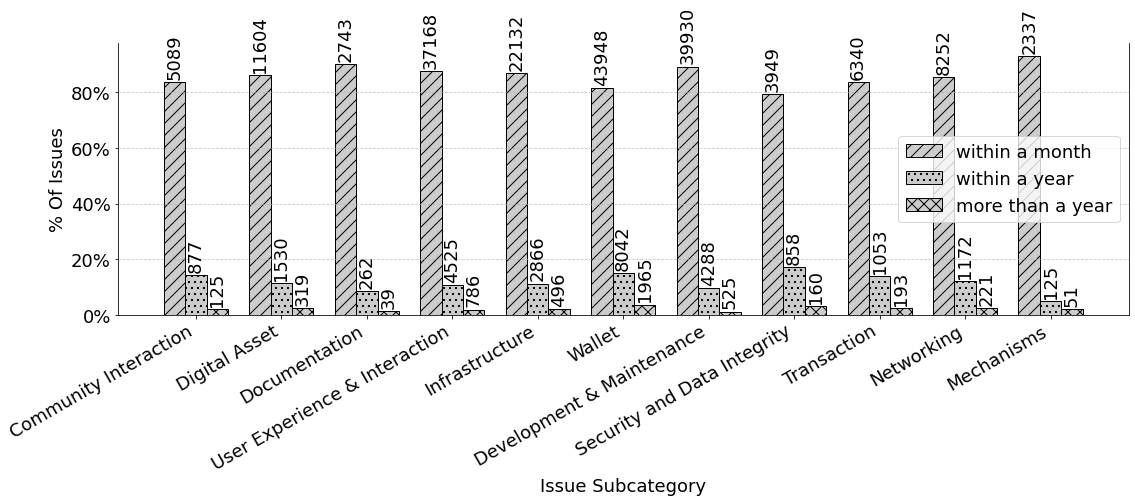

In [30]:
plot_grouped_barchart(summary_df, "./outputs/closed_duration")

In [ ]:
summary_df.to_csv("closed_various_duration.csv", index=False)

In [ ]:
pd.Timestamp.now()

Timestamp('2025-04-08 23:05:14.466091')

In [ ]:

csv_files = glob.glob("./Data/Output-BERTopic/MergedTopics-L2/*.csv")

min_year = 2012
max_year = 2024
all_durations = ["within a year", "more than a year"]

summary_data = []

for csv in csv_files:
    df = pd.read_csv(csv)
    
    df = df[df["State"] == "open"]
    df = df[~df["CreatedAt"].isna()]
    df["CreatedAt"] = pd.to_datetime(df["CreatedAt"])
    df["CreatedAt"] = df["CreatedAt"].dt.tz_convert("UTC")

    df["ResolutionTime"] = (pd.Timestamp.now(tz="UTC") - df["CreatedAt"]).dt.days
    
    df["Duration"] = pd.cut(
        df["ResolutionTime"],
        bins=[-1, 365, float("inf")],
        labels=all_durations
    )
    
    category = os.path.basename(csv).split(".")[0]
    duration_counts = df["Duration"].value_counts().reindex(all_durations, fill_value=0)
    total_count = duration_counts.sum()
    
    for duration in all_durations:
        count = duration_counts[duration]
        proportion = (count / total_count) * 100 if total_count > 0 else 0
        summary_data.append([category, duration, count, f"{proportion:.2f}%"])

summary_df_open = pd.DataFrame(summary_data, columns=["Type", "Duration", "Count", "Proportion"])

summary_df_open


,Type,Duration,Count,Proportion
0,Community Interaction,within a year,168,12.04%
1,Community Interaction,more than a year,1227,87.96%
2,Digital Asset,within a year,650,38.60%
3,Digital Asset,more than a year,1034,61.40%
4,Documentation,within a year,121,54.26%
5,Documentation,more than a year,102,45.74%
6,User Experience & Interaction,within a year,3245,34.78%
7,User Experience & Interaction,more than a year,6085,65.22%
8,Infrastructure,within a year,2058,41.69%
9,Infrastructure,more than a year,2879,58.31%


In [ ]:
summary_df_open.to_csv("open_various_duration.csv", index=False)

# Topic over time - Per Year

## L1

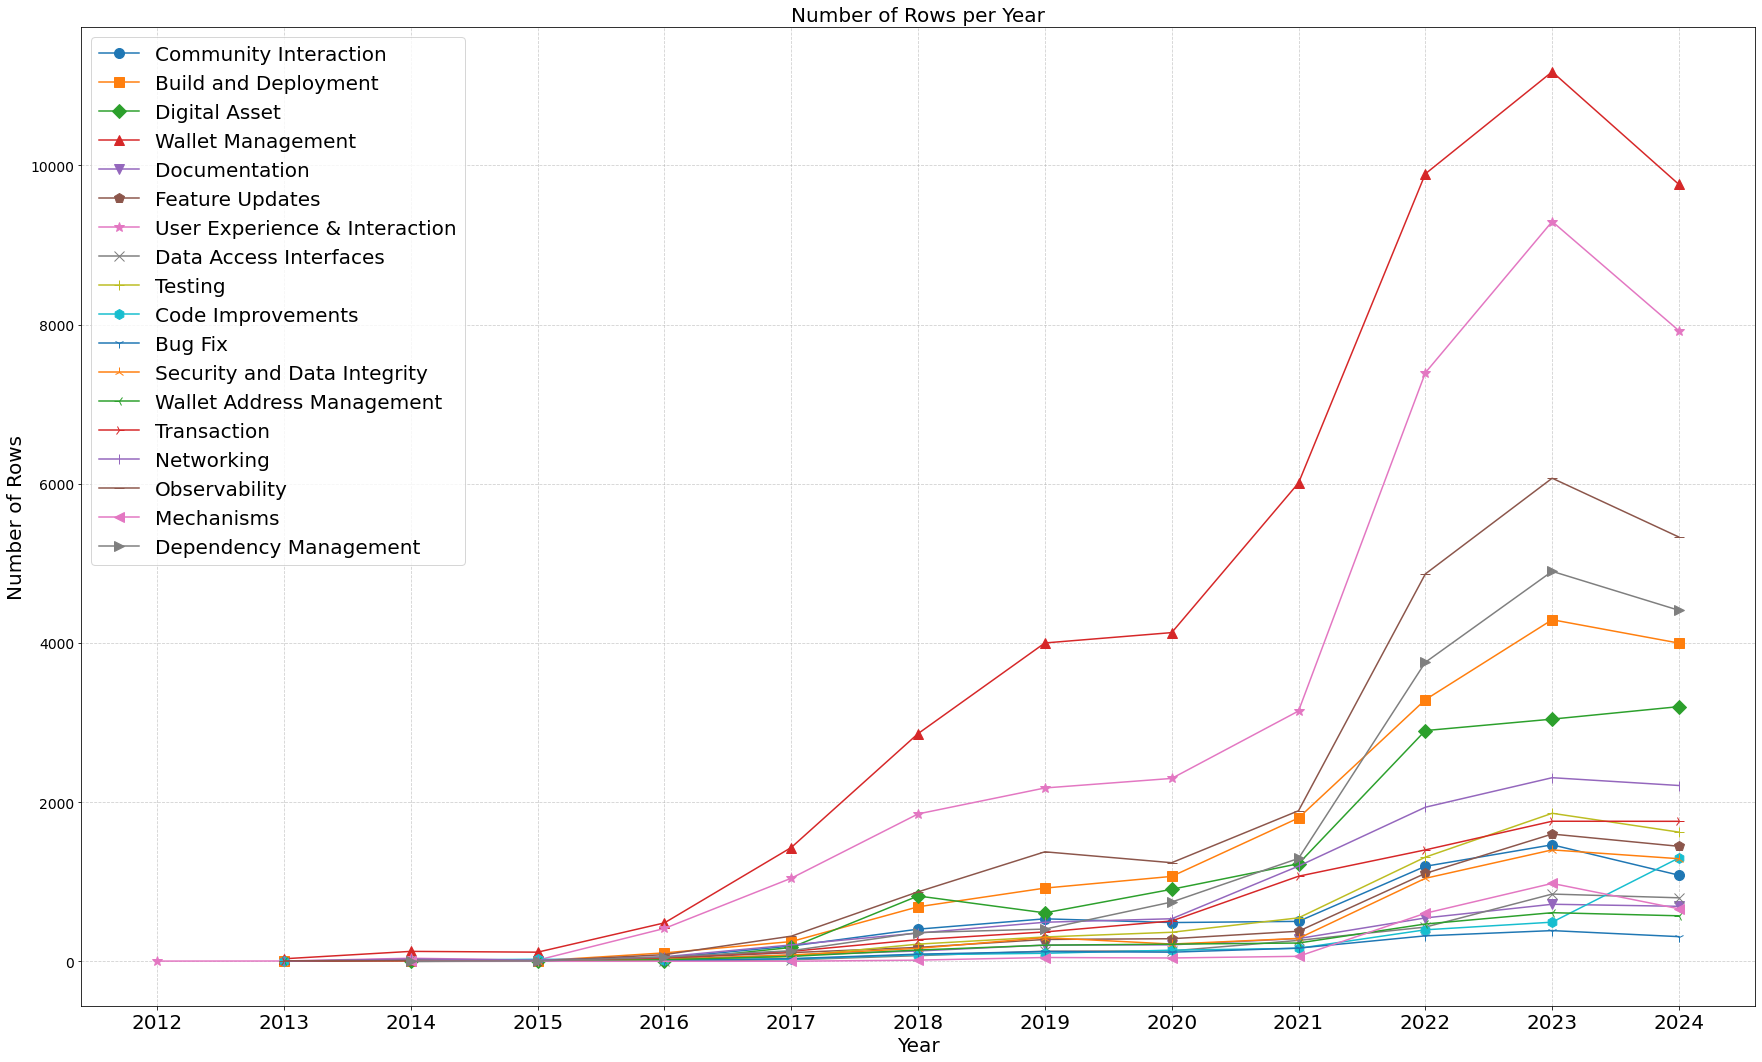

In [199]:
all_vals = []
csv_files = glob.glob("./Data/Output-BERTopic/MergedTopics/*.csv")
for csv in csv_files:
    df = pd.read_csv(csv)
    df = df[df["State"]=="closed"]
    df = df[~df["CreatedAt"].isna()]
    df['CreatedAt'] = pd.to_datetime(df['CreatedAt']) 
    df["year"] = df['CreatedAt'].dt.year
    df = df[df["year"] < 2025]
    df = df.sort_values(by="year")
    all_vals.append({
        "Category": os.path.basename(csv).split(".")[0],
        "count": df['year'].value_counts().sort_index()
    })

marker_styles = itertools.cycle(["o", "s", "D", "^", "v", "p", "*", "x", "+", "h", "1", "2", "3", "4", "|", "_", "<", ">", ".", ","])

plt.figure(figsize=(30, 18))
min_year = 2024
for item in all_vals:
    min_year = min(min(item["count"].index), min_year)
    plt.plot(item["count"].index, item["count"].values, label=item["Category"], markersize=10, marker=next(marker_styles))
plt.yticks(fontsize=14)
# Labels and title
plt.xticks(np.arange(min_year,2025,1), fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Number of Rows", fontsize=20)
plt.title("Number of Rows per Year", fontsize=20)
plt.legend(loc="upper left", fontsize=20)

# Show grid for better readability
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.show()


## L2

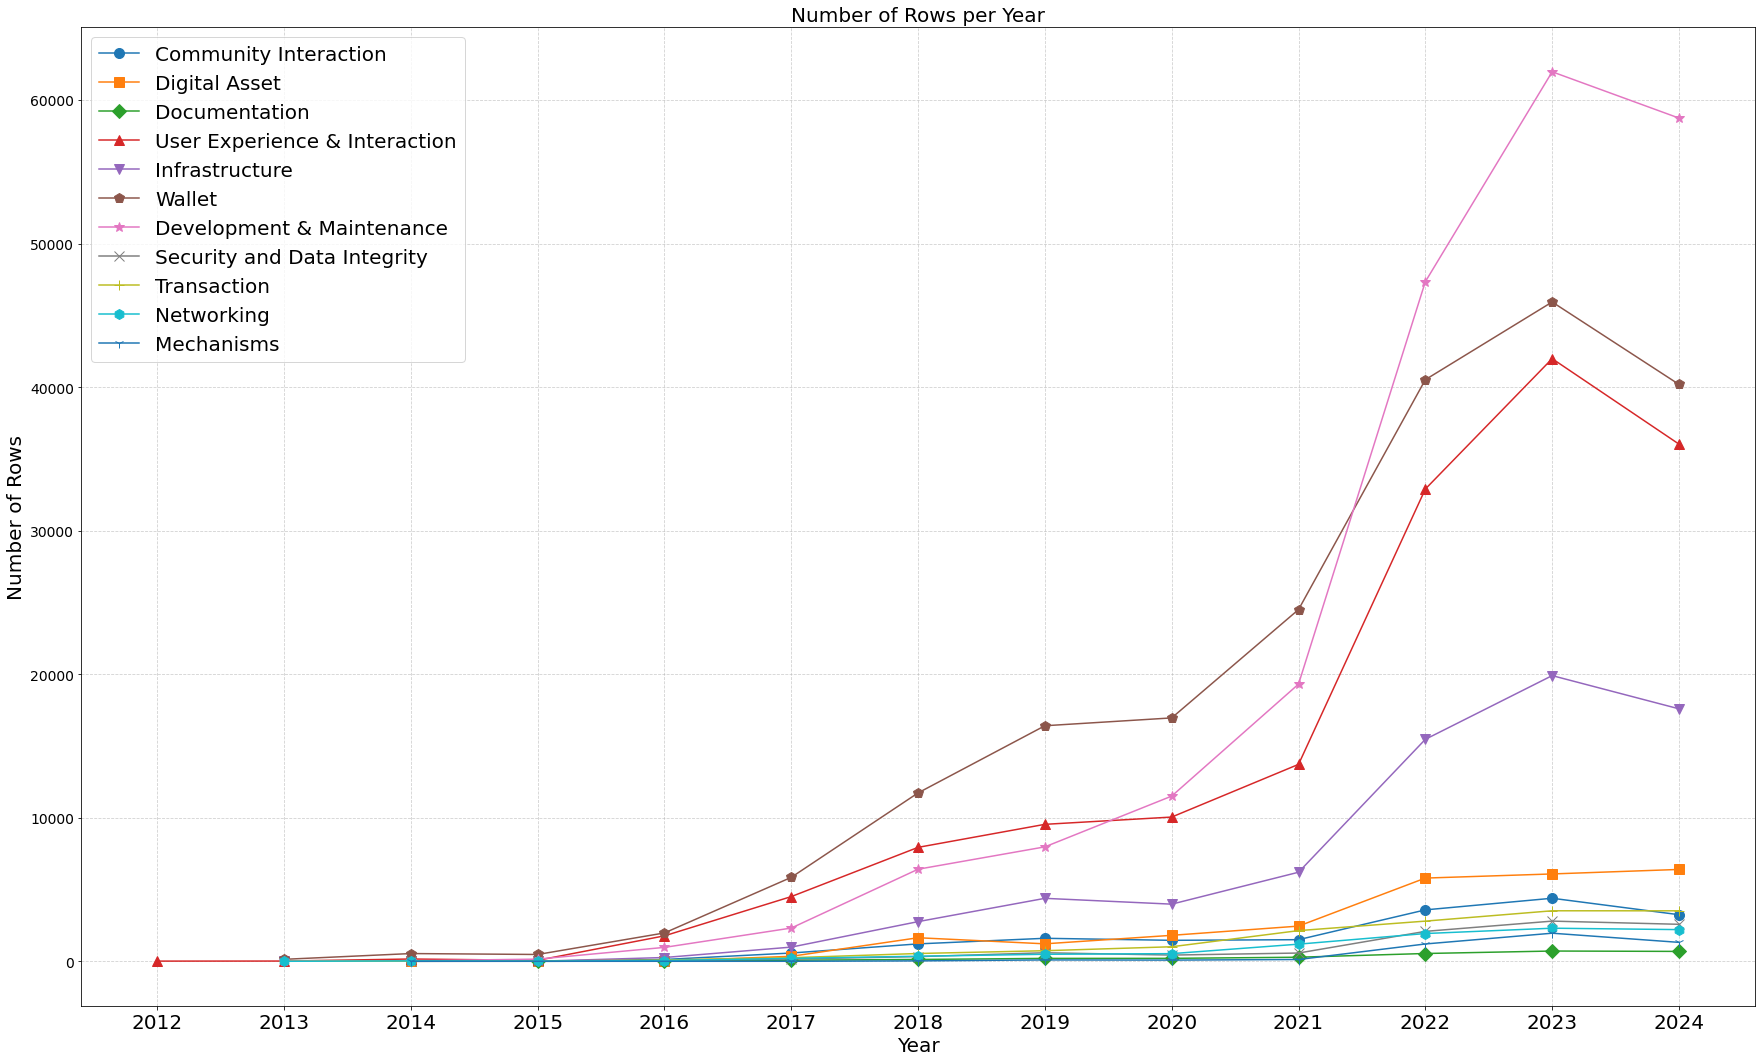

In [3]:
all_vals = []
csv_files = glob.glob("./Data/Output-BERTopic/MergedTopics-L2/*.csv")
for csv in csv_files:
    df = pd.read_csv(csv)
    df = df[df["State"]=="closed"]
    df = df[~df["CreatedAt"].isna()]
    df['CreatedAt'] = pd.to_datetime(df['CreatedAt']) 
    df["year"] = df['CreatedAt'].dt.year
    df = df[df["year"] < 2025]
    df = df.sort_values(by="year")
    all_vals.append({
        "Category": os.path.basename(csv).split(".")[0],
        "count": df['year'].value_counts().sort_index()
    })
marker_styles = itertools.cycle(["o", "s", "D", "^", "v", "p", "*", "x", "+", "h", "1", "2", "3", "4", "|", "_", "<", ">", ".", ","])
plt.figure(figsize=(30, 18))
min_year = 2024
for item in all_vals:
    min_year = min(min(item["count"].index), min_year)
    plt.plot(item["count"].index, item["count"].values, label=item["Category"],  markersize=10, marker=next(marker_styles))
plt.yticks(fontsize=14)
# Labels and title
plt.xticks(np.arange(min_year,2025,1), fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Number of Rows", fontsize=20)
plt.title("Number of Rows per Year", fontsize=20)
plt.legend(loc="upper left", fontsize=20)

# Show grid for better readability
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.show()

# Topic overtime- per quarter

## L2

In [10]:
all_vals = []
csv_files = glob.glob("./Data/Output-BERTopic/MergedTopics-L2/*.csv")

min_year = 2012
max_year = 2024
quarters = [f"{year}Q{q}" for year in range(min_year, max_year + 1) for q in range(1, 5)]


for csv in csv_files:
    df = pd.read_csv(csv)
    df = df[~df["CreatedAt"].isna()]
    df["CreatedAt"] = pd.to_datetime(df["CreatedAt"])
    df["year"] = df["CreatedAt"].dt.year
    df["quarter"] = df["CreatedAt"].dt.to_period("Q")
    df = df[df["year"] < 2025]
    df = df.sort_values(by=["year", "quarter"])
    
    quarterly_counts = df.groupby("quarter").size().reindex(quarters, fill_value=0)
    if (sum(quarterly_counts.values) != df.shape[0]):
        raise ValueError(f"Mismatch in counts for {os.path.basename(csv)}. Expected {df.shape[0]}, got {sum(quarterly_counts.values)}")
    
    all_vals.append({
        "Category": os.path.basename(csv).split(".")[0],
        "count": quarterly_counts
    })

<ipython-input-10-c946ba573b91>:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["quarter"] = df["CreatedAt"].dt.to_period("Q")
<ipython-input-10-c946ba573b91>:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["quarter"] = df["CreatedAt"].dt.to_period("Q")
<ipython-input-10-c946ba573b91>:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["quarter"] = df["CreatedAt"].dt.to_period("Q")
<ipython-input-10-c946ba573b91>:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["quarter"] = df["CreatedAt"].dt.to_period("Q")
<ipython-input-10-c946ba573b91>:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["quarter"] = df["CreatedAt"].dt.to_period("Q")
<ipython-input-10-c946ba573b91>:14: UserWarning: Converting to PeriodArray/Index representation will

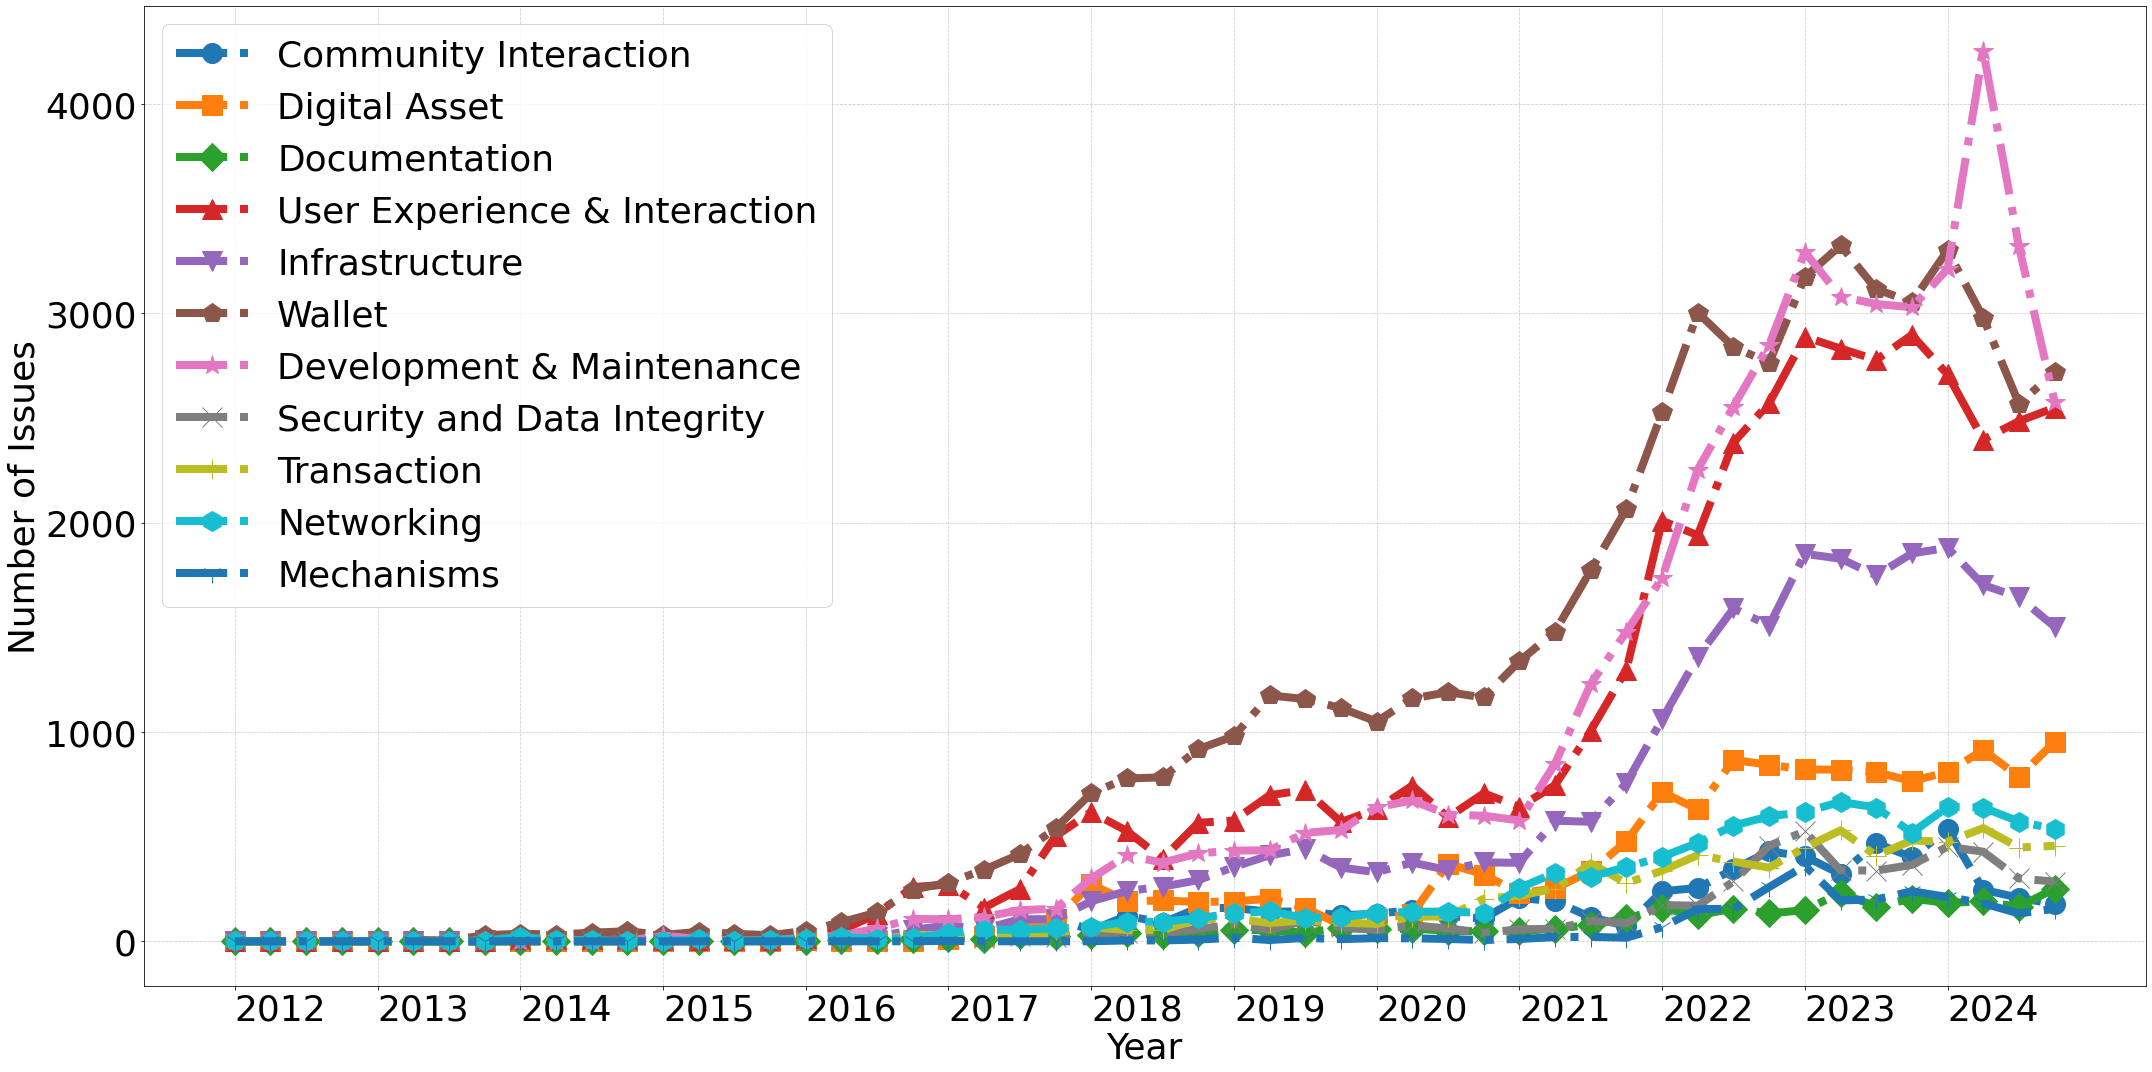

In [11]:
fontsize = 36
marker_styles = itertools.cycle(["o", "s", "D", "^", "v", "p", "*", "x", "+", "h", "1", "2", "3", "4", "|", "_", "<", ">", ".", ","])
plt.figure(figsize=(30, 15))

for item in all_vals:
    x_values = list(quarters)
    y_values = [item["count"].get(q, 0) for q in quarters]  # Ensure all quarters are represented
    plt.plot(x_values, y_values, '-.', label=item["Category"], markersize=20, marker=next(marker_styles), linewidth=8)

quarters_l = [f"{year}" for year in range(min_year, max_year + 1) for q in range(1, 5)]
plt.yticks(fontsize=fontsize)
plt.xticks(quarters[::4],labels=quarters_l[::4],fontsize=fontsize, ha='left')  # Show only years as labels, using one label per year
plt.xlabel("Year", fontsize=fontsize)
plt.ylabel("Number of Issues", fontsize=fontsize)
#plt.title("Number of Rows per Quarter (Grouped by Year)", fontsize=20)
plt.legend(loc="upper left", fontsize=fontsize)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("./outputs/RQ3.png", dpi=300)
plt.savefig("./outputs/RQ3.pdf", dpi=300, format="pdf")
plt.savefig("./outputs/RQ3.svg", format="svg")
plt.show()


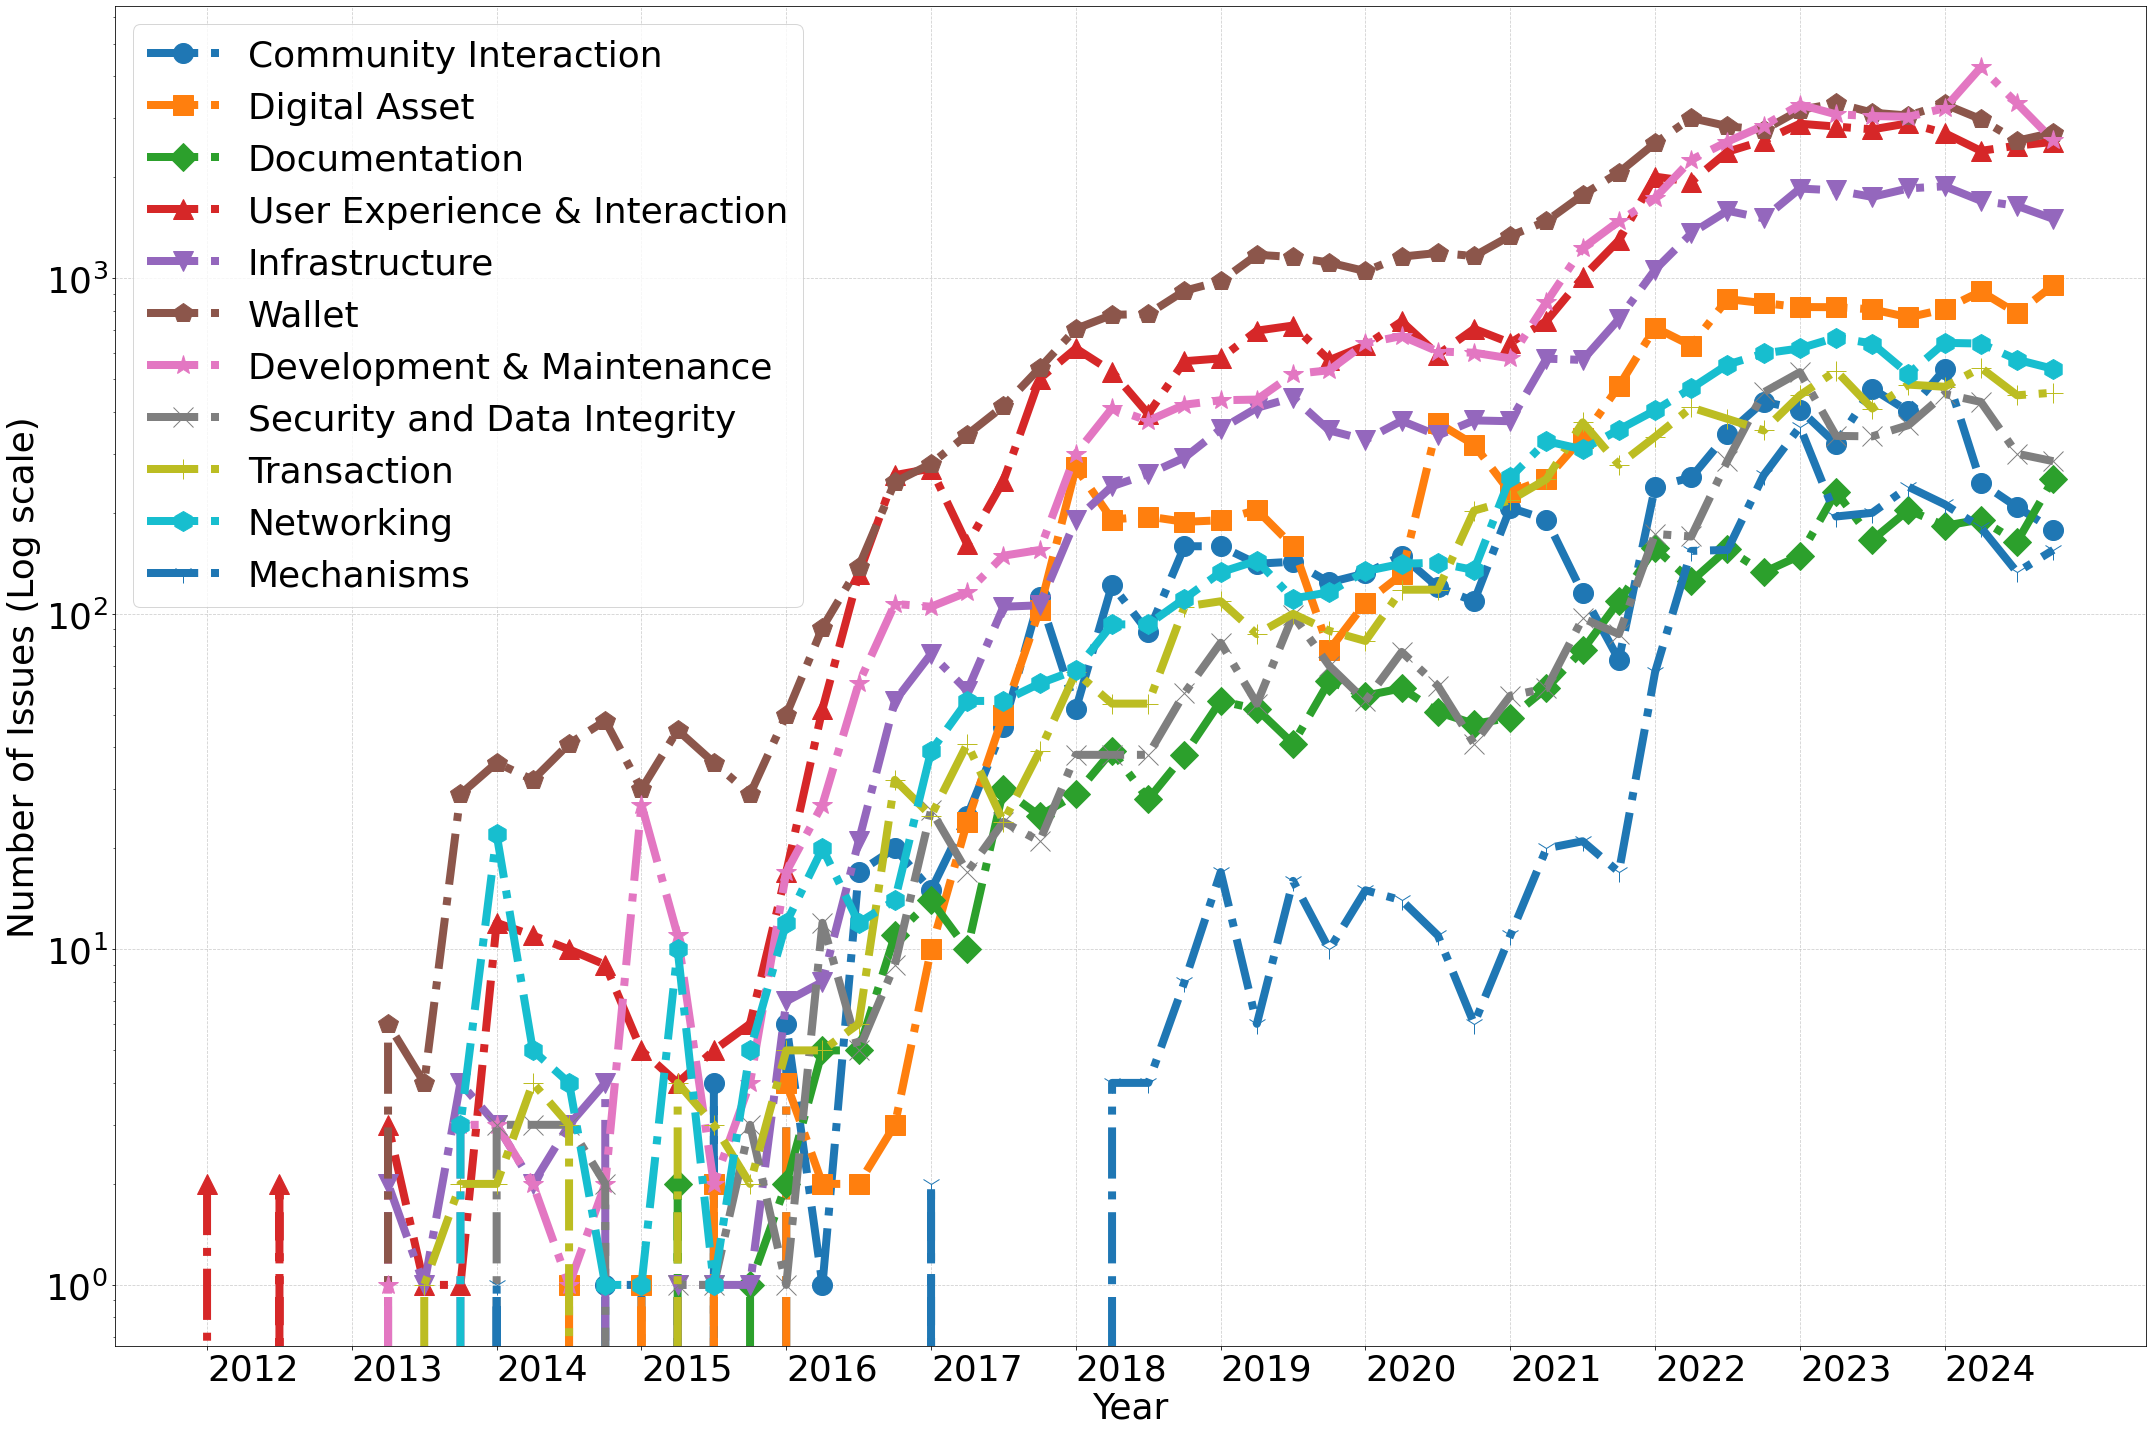

In [ ]:
fontsize = 36
marker_styles = itertools.cycle(["o", "s", "D", "^", "v", "p", "*", "x", "+", "h", "1", "2", "3", "4", "|", "_", "<", ">", ".", ","])
plt.figure(figsize=(30, 20))

for item in all_vals:
    x_values = list(quarters)
    y_values = [item["count"].get(q, 0) for q in quarters]  # Ensure all quarters are represented
    plt.plot(x_values, y_values, '-.', label=item["Category"], markersize=20, marker=next(marker_styles), linewidth=8)

quarters_l = [f"{year}" for year in range(min_year, max_year + 1) for q in range(1, 5)]
plt.yticks(fontsize=fontsize)
plt.xticks(quarters[::4],labels=quarters_l[::4],fontsize=fontsize, ha='left')  # Show only years as labels, using one label per year
plt.xlabel("Year", fontsize=fontsize)
plt.ylabel("Number of Issues (Log scale)", fontsize=fontsize)
#plt.title("Number of Rows per Quarter (Grouped by Year)", fontsize=20)
plt.legend(loc="upper left", fontsize=fontsize)
plt.grid(True, linestyle="--", alpha=0.6)
plt.yscale("log")
plt.tight_layout()
plt.savefig("./outputs/RQ3-logscale.png", dpi=300)
plt.savefig("./outputs/RQ3-logscale.pdf", dpi=300, format="pdf")
plt.savefig("./outputs/RQ3-logscale.svg", format="svg")
plt.show()


In [5]:

csv_files = glob.glob("./Data/Output-BERTopic/MergedTopics-L2/*.csv")

min_year = 2012
max_year = 2024
all_durations = ["within a month", "within a year", "more than a year"]

summary_data = []

for csv in csv_files:
    df = pd.read_csv(csv)
    
    df = df[df["State"] == "closed"]
    df = df[~df["CreatedAt"].isna()]
    df["CreatedAt"] = pd.to_datetime(df["CreatedAt"])
    df["ClosedAt"] = pd.to_datetime(df["ClosedAt"])
    
    df["ResolutionTime"] = (df["ClosedAt"] - df["CreatedAt"]).dt.days
    
    df["Duration"] = pd.cut(
        df["ResolutionTime"],
        bins=[-1, 30, 365, float("inf")],
        labels=all_durations
    )
    
    category = os.path.basename(csv).split(".")[0]
    duration_counts = df["Duration"].value_counts().reindex(all_durations, fill_value=0)
    total_count = duration_counts.sum()
    
    for duration in all_durations:
        count = duration_counts[duration]
        proportion = (count / total_count) * 100 if total_count > 0 else 0
        summary_data.append([category, duration, count, f"{proportion:.2f}%"])

summary_df = pd.DataFrame(summary_data, columns=["Type", "Duration", "Count", "Proportion"])

summary_df


,Type,Duration,Count,Proportion
0,Community Interaction,within a month,15267,83.55%
1,Community Interaction,within a year,2631,14.40%
2,Community Interaction,more than a year,375,2.05%
3,Digital Asset,within a month,23208,86.26%
4,Digital Asset,within a year,3060,11.37%
5,Digital Asset,more than a year,638,2.37%
6,Documentation,within a month,2743,90.11%
7,Documentation,within a year,262,8.61%
8,Documentation,more than a year,39,1.28%
9,User Experience & Interaction,within a month,143669,87.48%


## L1

<ipython-input-38-80cdee82b547>:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["quarter"] = df["CreatedAt"].dt.to_period("Q")
<ipython-input-38-80cdee82b547>:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["quarter"] = df["CreatedAt"].dt.to_period("Q")
<ipython-input-38-80cdee82b547>:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["quarter"] = df["CreatedAt"].dt.to_period("Q")
<ipython-input-38-80cdee82b547>:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["quarter"] = df["CreatedAt"].dt.to_period("Q")
<ipython-input-38-80cdee82b547>:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["quarter"] = df["CreatedAt"].dt.to_period("Q")
<ipython-input-38-80cdee82b547>:14: UserWarning: Converting to PeriodArray/Index representation will

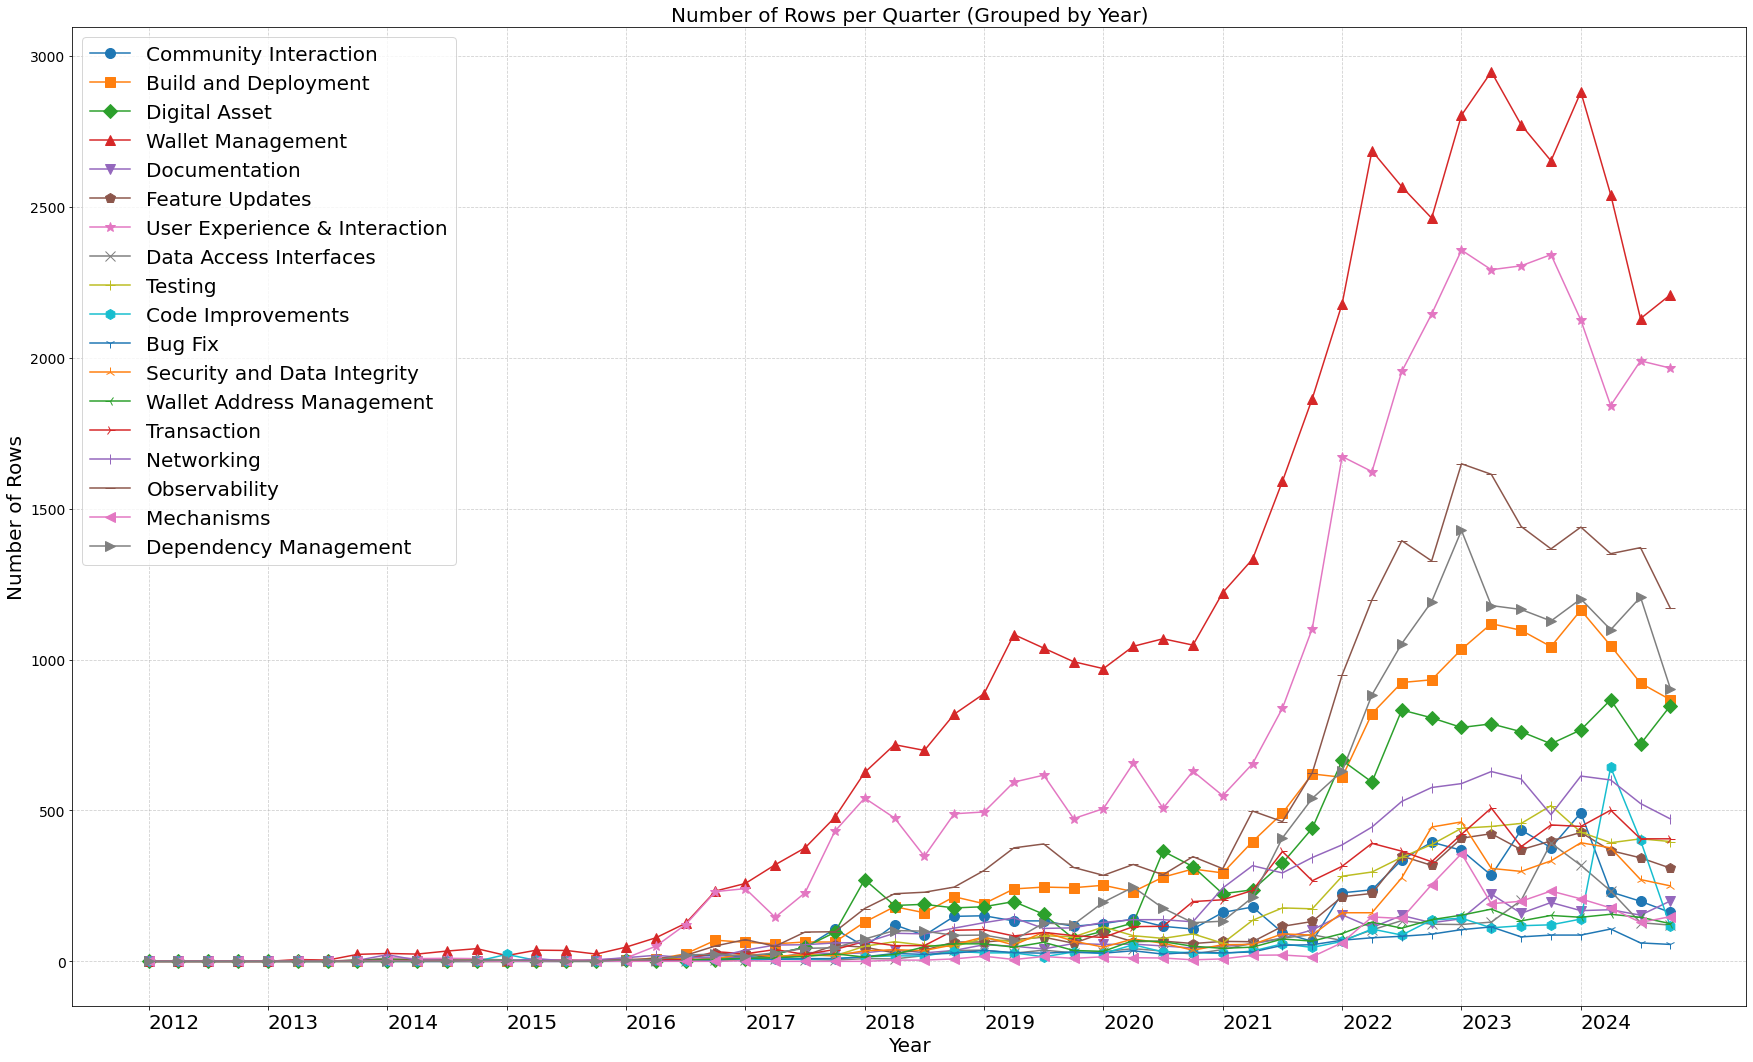

In [38]:
all_vals = []
csv_files = glob.glob("./Data/Output-BERTopic/MergedTopics/*.csv")

min_year = 2012
max_year = 2024
quarters = [f"{year}Q{q}" for year in range(min_year, max_year + 1) for q in range(1, 5)]

for csv in csv_files:
    df = pd.read_csv(csv)
    df = df[df["State"] == "closed"]
    df = df[~df["CreatedAt"].isna()]
    df["CreatedAt"] = pd.to_datetime(df["CreatedAt"])
    df["year"] = df["CreatedAt"].dt.year
    df["quarter"] = df["CreatedAt"].dt.to_period("Q")
    df = df[df["year"] < 2025]
    df = df.sort_values(by=["year", "quarter"])
    
    quarterly_counts = df.groupby("quarter").size().reindex(quarters, fill_value=0)
    
    all_vals.append({
        "Category": os.path.basename(csv).split(".")[0],
        "count": quarterly_counts
    })

marker_styles = itertools.cycle(["o", "s", "D", "^", "v", "p", "*", "x", "+", "h", "1", "2", "3", "4", "|", "_", "<", ">", ".", ","])
plt.figure(figsize=(30, 18))

for item in all_vals:
    x_values = list(quarters)
    y_values = [item["count"].get(q, 0) for q in quarters]  # Ensure all quarters are represented
    plt.plot(x_values, y_values, label=item["Category"], markersize=10, marker=next(marker_styles))

quarters_l = [f"{year}" for year in range(min_year, max_year + 1) for q in range(1, 5)]
plt.yticks(fontsize=14)
plt.xticks(quarters[::4],labels=quarters_l[::4],fontsize=20, ha='left')  # Show only years as labels, using one label per year
plt.xlabel("Year", fontsize=20)
plt.ylabel("Number of Rows", fontsize=20)
plt.title("Number of Rows per Quarter (Grouped by Year)", fontsize=20)
plt.legend(loc="upper left", fontsize=20)

plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


# Statistical Significance test

## Resolution time

In [ ]:
from scipy import stats

In [118]:
all_vals = []
names = []
csv_files = glob.glob("./Data/Output-BERTopic/MergedTopics-L2/*.csv")
for csv in csv_files:
    df = pd.read_csv(csv)
    df = df[df["State"]=="closed"]
    df = df[~df["CreatedAt"].isna()]
    df['CreatedAt'] = pd.to_datetime(df['CreatedAt']) 
    df = df[~df["ClosedAt"].isna()]
    df['ClosedAt'] = pd.to_datetime(df['ClosedAt']) 
    df["ResolutionTime"] = (df["ClosedAt"] - df["CreatedAt"]).dt.total_seconds()
    # filter here
    #df = df[df["ResolutionTime"] > 600]
    #
    df["ResolutionTime"] = (df["ClosedAt"] - df["CreatedAt"]).dt.total_seconds() / 86400
    all_vals.append( df["ResolutionTime"].to_list())
    names = [os.path.basename(csv).split(".")[0] for csv in csv_files]
kw = stats.kruskal(*all_vals)

In [119]:
kw

KruskalResult(statistic=3640.6737177575856, pvalue=0.0)

## Frequency

In [120]:
all_vals = []
csv_files = glob.glob("./Data/Output-BERTopic/MergedTopics-L2/*.csv")

min_year = 2012
max_year = 2024
quarters = [f"{year}Q{q}" for year in range(min_year, max_year + 1) for q in range(1, 5)]


for csv in csv_files:
    df = pd.read_csv(csv)
    df = df[~df["CreatedAt"].isna()]
    df["CreatedAt"] = pd.to_datetime(df["CreatedAt"])
    df["year"] = df["CreatedAt"].dt.year
    df["quarter"] = df["CreatedAt"].dt.to_period("Q")
    df = df[df["year"] < 2025]
    df = df.sort_values(by=["year", "quarter"])
    
    quarterly_counts = df.groupby("quarter").size().reindex(quarters, fill_value=0)
    if (sum(quarterly_counts.values) != df.shape[0]):
        raise ValueError(f"Mismatch in counts for {os.path.basename(csv)}. Expected {df.shape[0]}, got {sum(quarterly_counts.values)}")
    
    all_vals.append(quarterly_counts.to_list())
kw = stats.kruskal(*all_vals)

<ipython-input-120-81815f51d538>:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["quarter"] = df["CreatedAt"].dt.to_period("Q")
<ipython-input-120-81815f51d538>:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["quarter"] = df["CreatedAt"].dt.to_period("Q")
<ipython-input-120-81815f51d538>:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["quarter"] = df["CreatedAt"].dt.to_period("Q")
<ipython-input-120-81815f51d538>:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["quarter"] = df["CreatedAt"].dt.to_period("Q")
<ipython-input-120-81815f51d538>:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["quarter"] = df["CreatedAt"].dt.to_period("Q")
<ipython-input-120-81815f51d538>:14: UserWarning: Converting to PeriodArray/Index representatio

In [121]:
kw

KruskalResult(statistic=93.67451033906468, pvalue=9.973828404913613e-16)